In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fast')


#Some cells from the Lineage data
linage = {}
linage["linage1"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160221/line_data/fov20_line0001.csv')
linage["linage2"]= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov04_line0001.csv')
linage["linage3"]= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov23_line0001.csv')
linage["linage4"]= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov01_line0001.csv')
linage["linage5"]= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov02_line0001.csv')
linage["linage6"]= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov03_line0001.csv')
linage["linage7"]= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov05_line0001.csv')
linage["linage8"]= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov06_line0001.csv')
linage["linage9"]= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov07_line0001.csv')
linage["linage10"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov08_line0001.csv')
linage["linage11"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160221/line_data/fov09_line0001.csv')
linage["linage12"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov10_line0001.csv')
linage["linage13"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov11_line0001.csv')
linage["linage14"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov12_line0001.csv')
linage["linage15"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov13_line0001.csv')
linage["linage16"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov14_line0001.csv')
linage["linage17"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov15_line0001.csv')
linage["linage18"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov16_line0001.csv')
linage["linage19"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov17_line0001.csv')
linage["linage20"] = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/line_data/fov18_line0001.csv')

#Whole data with divisions
df1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160221/20160221_flat.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/20160306_flat.csv')
df = pd.concat([df1, df2])
images_dir = '/content/drive/MyDrive/ColabNotebooks/Project/Plots'


# **Instantaneous Values**

## Volume

(0.1, 3.9)

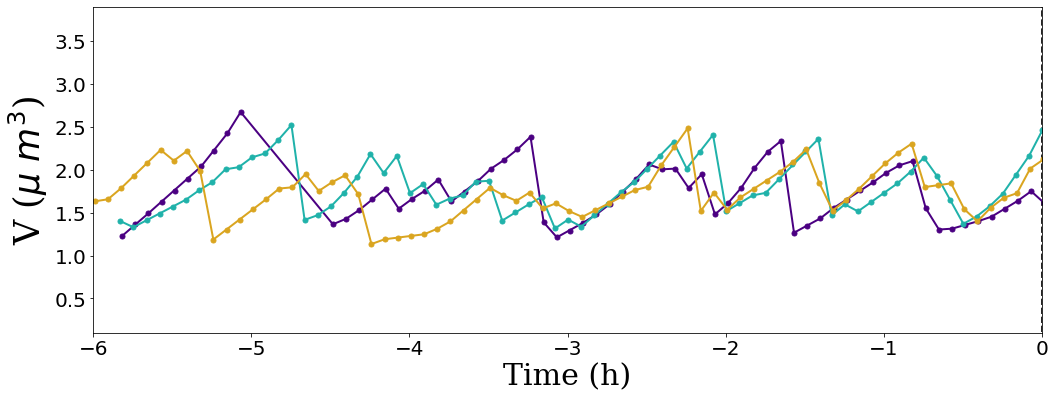

In [53]:
v = {}
for i in range(20):
    v["v{}".format(i+1)] = linage["linage{}".format(i+1)][['tTrans', 'V']].pivot_table(index= 'tTrans')
    v["v{}".format(i+1)] = v["v{}".format(i+1)].reset_index(['tTrans'])

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=5,color='k',  ls='--',lw = 1.7)
plt.plot(v["v9"]['tTrans']/60, v["v9"]['V'], ls='-', color= 'indigo', lw = 2, marker = 'o', markersize= 5)
plt.plot(v["v4"]['tTrans']/60, v["v4"]['V'], ls='-', color= 'lightseagreen', lw = 2, marker = 'o', markersize= 5)
plt.plot(v["v2"]['tTrans']/60, v["v2"]['V'], ls='-', color= 'goldenrod', lw = 2, marker = 'o', markersize= 5)
ax.xaxis.set_ticks(np.arange(-6, 9, 1))
plt.xlabel(r'Time (h)', family="serif",fontsize = 30)
#plt.text(-4.9, 4, r'(a)',family="serif", fontsize=52)
plt.ylabel(r'V ($\mu$ $m^3$)', family="serif", fontsize = 35)
plt.xlim(-6,0)
plt.ylim(0.1,3.9)
#plt.savefig(f"{images_dir}/IndividualVolume.png", bbox_inches="tight", dpi=200)

Slope1: 0.01847511352399647
 Y interset1: 0.0020744693019046296
Slope2: 0.018704752642491634
 Y interset2: -0.007168469132812905


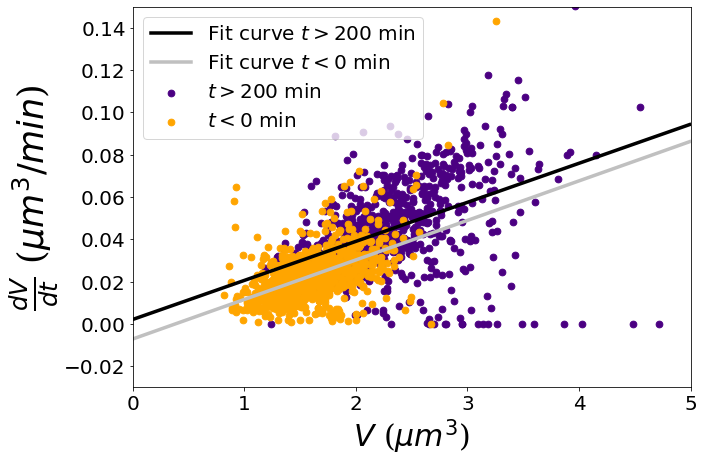

In [58]:
dvdt = {}

for i in range(20):
  dvdt["dvdt{}".format(i+1)] = np.array([])
  
  for j in range(len(v["v{}".format(i+1)]) -1):
    dvdt["dvdt{}".format(i+1)] = np.append(dvdt["dvdt{}".format(i+1)], (v["v{}".format(i+1)]['V'].iloc[j+1] - v["v{}".format(i+1)]['V'].iloc[j])/(v["v{}".format(i+1)]['tTrans'].iloc[j+1] - v["v{}".format(i+1)]['tTrans'].iloc[j]))
  
  v["v{}".format(i+1)]['dvdt'] = pd.DataFrame(dvdt["dvdt{}".format(i+1)])
  v["v{}".format(i+1)] = v["v{}".format(i+1)].fillna(0)

vol = pd.concat([v["v1"], v["v2"], v["v3"], v["v4"], v["v5"], v["v6"], v["v7"], v["v8"], v["v9"], v["v10"], v["v11"], v["v12"], v["v13"], v["v14"], v["v15"], v["v16"], v["v17"], v["v18"], v["v19"], v["v20"]])

v_after = vol[vol['tTrans']>=200]
v_after = v_after[v_after['dvdt']>=0]

v_before = vol[vol['tTrans']<0]
v_before = v_before[v_before['dvdt']>=0]
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
 
#Fitting function
def func(x, a, b):
    return a*x+b

#Plot experimental data points
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(10,7))
ax = plt.subplot()
plt.scatter(v_after['V'], v_after['dvdt'], color= 'indigo',label='$t>200$ min', s = 45)
plt.scatter(v_before['V'], v_before['dvdt'], color= 'orange',label='$t<0$ min', s = 45)
plt.xlabel(r'$V$ ($\mu m^{3}$)', family="serif",fontsize = 30)
plt.ylabel(r'$\frac{dV}{dt}$ ($\mu m^{3}/min$)', family="serif", fontsize = 35)
#plt.text(-1.3, 0.15, r'(b)',family="serif", fontsize=52)
plt.xlim(0,5)
plt.ylim(-0.03,0.15)
 
# Initial guess for the parameters
initialGuess = [1,1]    
 
#Perform the curve-fit
popt1, pcov1 = curve_fit(func, v_after['V'], v_after['dvdt'], initialGuess)
popt2, pcov2 = curve_fit(func, v_before['V'], v_before['dvdt'], initialGuess)
print('Slope1: '+ str(popt1[0]) + '\n Y interset1: '+ str(popt1[1]))
print('Slope2: '+ str(popt2[0]) + '\n Y interset2: '+ str(popt2[1]))

#x values for the fitted function
xFit = np.arange(-5, 5.0, 0.01)
 
#Plot the fitted function
plt.plot(xFit, func(xFit, *popt1), color='k',lw=3.5,label='Fit curve $t>200$ min')
plt.plot(xFit, func(xFit, *popt2), color='silver',lw=3.5,label='Fit curve $t<0$ min')
plt.legend(prop={"size":20})
#plt.savefig(f"{images_dir}/dVdt.png", bbox_inches="tight", dpi=200)

## Growth rate

(-0.01, 0.05)

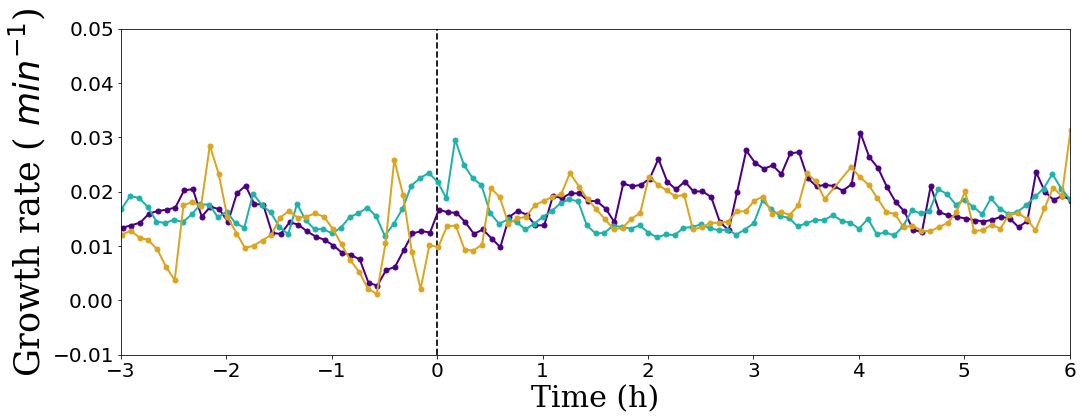

In [57]:
g = {}
for i in range(20):
    g["g{}".format(i+1)] = linage["linage{}".format(i+1)][['tTrans', 'growthRateV2_0']].pivot_table(index= 'tTrans')
    g["g{}".format(i+1)] = g["g{}".format(i+1)].reset_index(['tTrans'])

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=-0.02, ymax=0.05,color='k',  ls='--',lw = 1.7)
plt.plot(g["g9"]['tTrans']/60, g["g9"]['growthRateV2_0'], ls='-', color= 'indigo', lw = 2, marker = 'o', markersize= 5)
plt.plot(g["g4"]['tTrans']/60, g["g4"]['growthRateV2_0'], ls='-', color= 'lightseagreen', lw = 2, marker = 'o', markersize= 5)
plt.plot(g["g2"]['tTrans']/60, g["g2"]['growthRateV2_0'], ls='-', color= 'goldenrod', lw = 2, marker = 'o', markersize= 5)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlabel(r'Time (h)', family="serif",fontsize = 30)
plt.ylabel(r'Growth rate ( $min^{-1}$)', family="serif", fontsize = 35)
plt.xlim(-3,6)
#plt.text(-4.9, 0.05, r'(c)',family="serif", fontsize=52)
plt.ylim(-0.01,0.05)
#plt.savefig(f"{images_dir}/IndividualGrowth.png", bbox_inches="tight", dpi=100)

Slope1: -0.0394427537224737
 Y interset1: 7.969313583725357e-05
Slope2: -0.042049247439078945
 Y interset2: -0.0001383201136887917


(-0.004, 0.005)

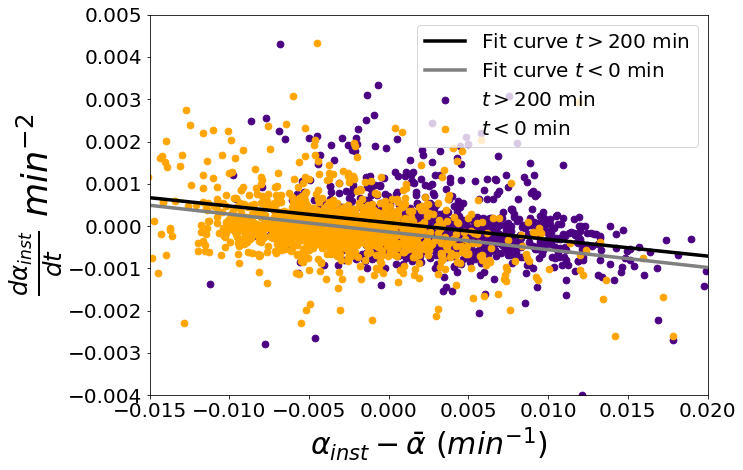

In [63]:
dalphadt = {}
mean_growth = {}

for i in range(20):
  dvdt["dalphadt{}".format(i+1)] = np.array([])
  
  for j in range(len(g["g{}".format(i+1)]) -1):
    dvdt["dalphadt{}".format(i+1)] = np.append(dvdt["dalphadt{}".format(i+1)], (g["g{}".format(i+1)]['growthRateV2_0'].iloc[j+1] - g["g{}".format(i+1)]['growthRateV2_0'].iloc[j])/(g["g{}".format(i+1)]['tTrans'].iloc[j+1] - g["g{}".format(i+1)]['tTrans'].iloc[j]))
  
  mean_growth["mean{}".format(i+1)] = g["g{}".format(i+1)]['growthRateV2_0'].mean(axis=0)
  g["g{}".format(i+1)]['alpha - alphamean'] = g["g{}".format(i+1)].apply(lambda x: x['growthRateV2_0'] - mean_growth["mean{}".format(i+1)], axis=1)   # Sustract the mean for centering
  g["g{}".format(i+1)]['dalphadt'] = pd.DataFrame(dvdt["dalphadt{}".format(i+1)])
  g["g{}".format(i+1)] = g["g{}".format(i+1)].fillna(0)

growth = pd.concat([g["g1"], g["g2"], g["g3"], g["g4"], g["g5"], g["g6"], g["g7"], g["g8"], g["g9"], g["g10"], g["g11"], g["g12"], g["g13"], g["g14"], g["g15"], g["g16"], g["g17"], g["g18"], g["g19"], g["g20"]])
#g = g.pivot_table(index= 'dalphadt').reset_index(['dalphadt'])
g_after = growth[growth['tTrans']>=200]
g_before = growth[growth['tTrans']<0]

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
 
#Fitting function
def func(x, a, b):
    return a*x+b
#Plot experimental data points
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(10,7))
ax = plt.subplot()
plt.scatter(g_after['alpha - alphamean'], g_after['dalphadt'], color= 'indigo', label = '$t>200$ min', s=45)
plt.scatter(g_before['alpha - alphamean'], g_before['dalphadt'], color= 'orange', label = '$t<0$ min', s=45)
plt.xlabel(r'$\alpha_{inst} - \bar{\alpha}$ $(min^{-1})$', family="serif",fontsize = 30)
plt.ylabel(r'$\frac{d\alpha_{inst}}{dt}$ $min^{-2}$', family="serif", fontsize = 35)
#plt.text(-0.025, 0.004, r'(d)',family="serif", fontsize=52)
plt.xlim(-0.015,0.02)
#plt.ylim(-0.16,0.15)
 
# Initial guess for the parameters
initialGuess = [1,1]    
 
#Perform the curve-fit
popt1, pcov1 = curve_fit(func, g_after['alpha - alphamean'], g_after['dalphadt'], initialGuess)
popt2, pcov2 = curve_fit(func, g_before['alpha - alphamean'], g_before['dalphadt'], initialGuess)

print('Slope1: '+ str(popt1[0]) + '\n Y interset1: '+ str(popt1[1]))
print('Slope2: '+ str(popt2[0]) + '\n Y interset2: '+ str(popt2[1]))

#x values for the fitted function
xFit = np.arange(-5, 5.0, 0.01)
 
#Plot the fitted function
plt.plot(xFit, func(xFit, *popt1), color='k',lw=3.5,label='Fit curve $t>200$ min')
plt.plot(xFit, func(xFit, *popt2), color='gray',lw=3.5,label='Fit curve $t<0$ min')
plt.legend(prop={"size":20})
plt.ylim(-0.004, 0.005)
#plt.savefig(f"{images_dir}/dalphadt.png", bbox_inches="tight", dpi=200)


## Distributions

### Before

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Data $\mu = -0.001$, $sigma= 0.002$


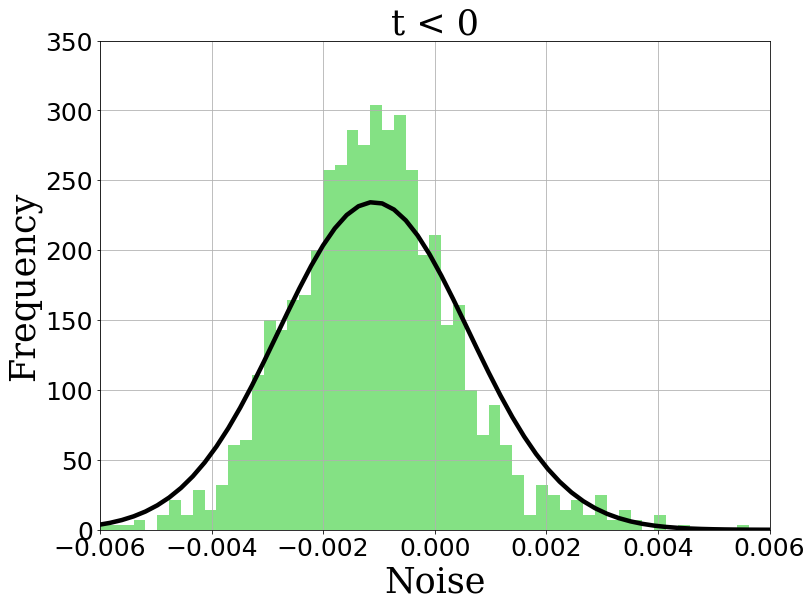

In [64]:
growth = pd.concat([g["g1"], g["g2"], g["g3"], g["g4"], g["g5"], g["g6"], g["g7"], g["g8"], g["g9"], g["g10"], g["g11"], g["g12"], g["g13"], g["g14"], g["g15"], g["g16"], g["g17"], g["g18"], g["g19"], g["g20"]])
g_gaussian = growth[growth['tTrans']<0]
g_gaussian['noise_date'] = g_gaussian.apply(lambda x: x['dalphadt']+ (x['alpha - alphamean'])/3, axis=1)   # Sustract the mean for centering

import scipy
from scipy.stats import norm
import matplotlib.mlab as mlab
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
# best fit of data
(mu_data, sigma_data) = norm.fit(g_gaussian['noise_date'])

plt.figure(figsize = (12,9))

# The histogram of the DATA
n_data, bins_data, patches_data = plt.hist(g_gaussian['noise_date'], 120,  facecolor='limegreen', alpha=0.6,  density=1)

# Add a 'best fit' line
y = scipy.stats.norm.pdf(bins_data, mu_data, sigma_data)
l = plt.plot(bins_data, y, '-',color='k', linewidth=4.5, label = 'Cell 1')
print(r'Data $\mu = %.3f$, $sigma= %.3f$' %(mu_data, sigma_data))


#Plot
plt.xlabel('Noise', family= "serif", size = 35)
plt.ylabel('Frequency', family= "serif", size = 35)
plt.title('t < 0', size = 35, family= "serif")
plt.grid(True)
plt.xlim(-0.006,0.006)
plt.ylim(0,350)
#plt.text(-2.5, 12, r'$\frac{d\alpha_{inst}}{dt} + \frac{\alpha_{inst} - \bar{\alpha}}{T}$ =  Noise', size = 45)
#plt.text(-2.3, 8, '$T = 0.25$', size = 50)
#plt.legend(prop={'size':25})
#plt.savefig(f"{images_dir}/DistributionNoiseBefore.png", bbox_inches="tight", dpi=100)
plt.show()

### Middle

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Data $\mu = 0.000$, $sigma= 0.003$


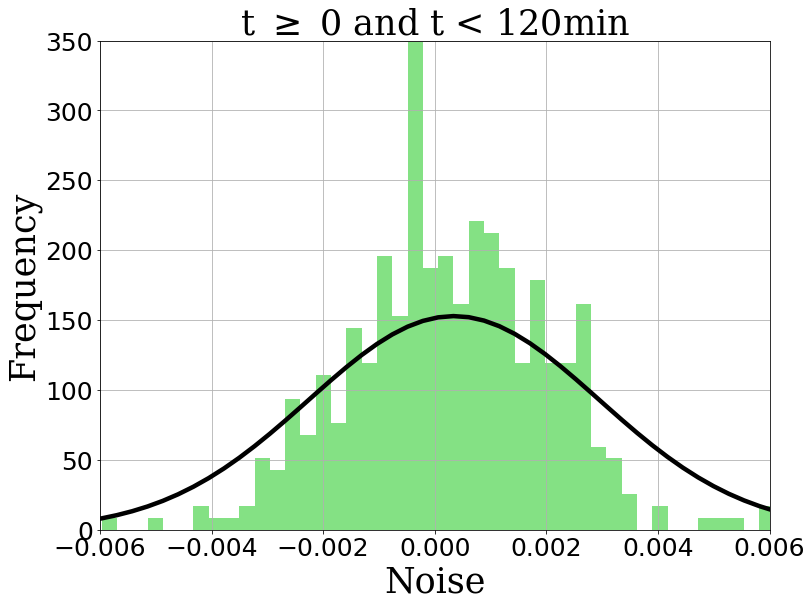

In [65]:
g_gaussian = growth[(growth['tTrans']>=0) & (growth['tTrans']<120)]
g_gaussian['noise_date'] = g_gaussian.apply(lambda x: x['dalphadt']+ (x['alpha - alphamean'])/3, axis=1)   # Sustract the mean for centering

import scipy
from scipy.stats import norm
import matplotlib.mlab as mlab
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
# best fit of data
(mu_data, sigma_data) = norm.fit(g_gaussian['noise_date'])

plt.figure(figsize = (12,9))

# The histogram of the DATA
n_data, bins_data, patches_data = plt.hist(g_gaussian['noise_date'], 120,  facecolor='limegreen', alpha=0.6,  density=1)

# Add a 'best fit' line
y = scipy.stats.norm.pdf(bins_data, mu_data, sigma_data)
l = plt.plot(bins_data, y, '-',color='k', linewidth=4.5, label = 'Cell 1')
print(r'Data $\mu = %.3f$, $sigma= %.3f$' %(mu_data, sigma_data))


#Plot
plt.xlabel('Noise', family= "serif", size = 35)
plt.ylabel('Frequency', family= "serif", size = 35)
plt.title('t $\geq$ 0 and t < 120min', size = 35, family= "serif")
plt.grid(True)
plt.xlim(-0.006,0.006)
plt.ylim(0,350)
#plt.text(-2.5, 12, r'$\frac{d\alpha_{inst}}{dt} + \frac{\alpha_{inst} - \bar{\alpha}}{T}$ =  Noise', size = 45)
#plt.text(-2.3, 8, '$T = 0.25$', size = 50)
#plt.legend(prop={'size':25})
#plt.savefig(f"{images_dir}/DistributionNoiseMiddle.png", bbox_inches="tight", dpi=100)
plt.show()

### After

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Data $\mu = 0.001$, $sigma= 0.002$


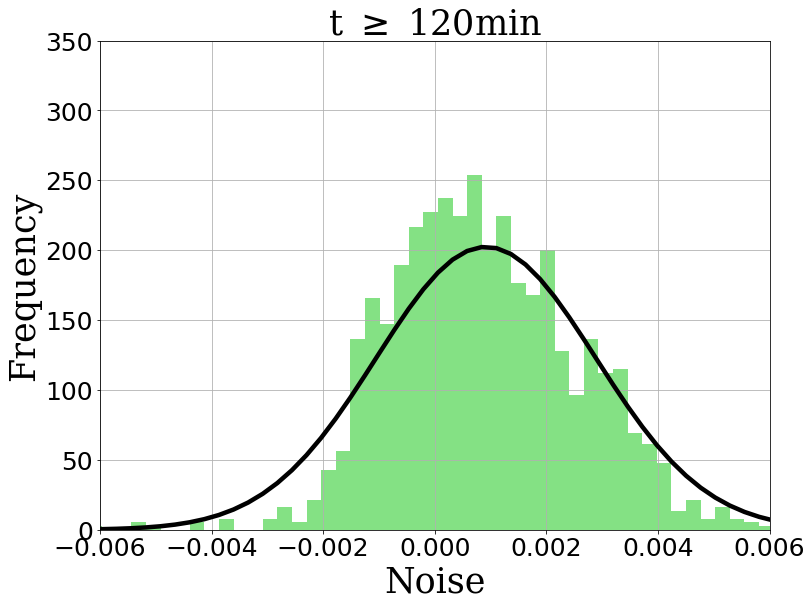

In [66]:
g_gaussian = growth[growth['tTrans']>=120]
g_gaussian['noise_date'] = g_gaussian.apply(lambda x: x['dalphadt']+ (x['alpha - alphamean'])/3, axis=1)   # Sustract the mean for centering

import scipy
from scipy.stats import norm
import matplotlib.mlab as mlab
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
# best fit of data
(mu_data, sigma_data) = norm.fit(g_gaussian['noise_date'])

plt.figure(figsize = (12,9))

# The histogram of the DATA
n_data, bins_data, patches_data = plt.hist(g_gaussian['noise_date'], 120,  facecolor='limegreen', alpha=0.6,  density=1)

# Add a 'best fit' line
y = scipy.stats.norm.pdf(bins_data, mu_data, sigma_data)
l = plt.plot(bins_data, y, '-',color='k', linewidth=4.5, label = 'Cell 1')
print(r'Data $\mu = %.3f$, $sigma= %.3f$' %(mu_data, sigma_data))


#Plot
plt.xlabel('Noise', family= "serif", size = 35)
plt.ylabel('Frequency', family= "serif", size = 35)
plt.title('t $\geq$ 120min', size = 35, family= "serif")
plt.grid(True)
plt.xlim(-0.006,0.006)
plt.ylim(0,350)
#plt.text(-2.5, 12, r'$\frac{d\alpha_{inst}}{dt} + \frac{\alpha_{inst} - \bar{\alpha}}{T}$ =  Noise', size = 45)
#plt.text(-2.3, 8, '$T = 0.25$', size = 50)
#plt.legend(prop={'size':25})
#plt.savefig(f"{images_dir}/DistributionNoiseAfter.png", bbox_inches="tight", dpi=100)
plt.show()

### Variance of dalpha/dt in different bins of alpha - bar{alpha}

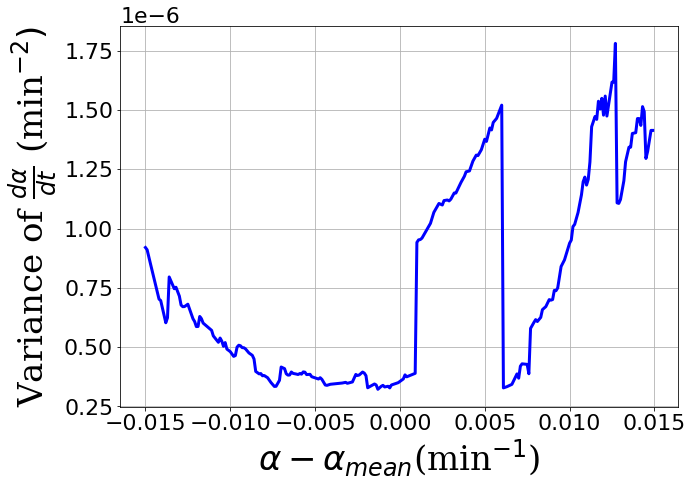

In [79]:
variance = np.array([])
m=0
step = 0.0001
y = np.arange( -0.015, 0.015, step)

for i in range(len(y)):
   bin = growth.loc[(growth['alpha - alphamean'] >= -0.015 + m) & (growth['alpha - alphamean']<-0.010+ m + step)]
   variance = np.append(variance, bin['dalphadt'].var())
   m = m +step

plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.figure(figsize= (10,7))
plt.plot(y, variance, '-', color = 'blue', lw = 3 )
plt.xlabel(r'$\alpha - \alpha_{mean} $(min$^{-1}$)', family = 'serif' , size = 34)
plt.ylabel(r'Variance of $\frac{d\alpha}{dt}$ (min$^{-2})$', family = 'serif' ,size = 34)
plt.grid()
#plt.savefig(f"{images_dir}/Varianceofdalphadt.png", bbox_inches="tight", dpi=100)